In [3]:
import opendatasets as od 

od.download("https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/mragpavank/heart-diseaseuci


100%|██████████| 3.40k/3.40k [00:00<00:00, 500kB/s]

In [32]:
## imports 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score


In [2]:
## load the data into the dataset 

df = pd.read_csv('heart-diseaseuci/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
dict = {
    'cp':'Chest_Pain', 
    'trestbps':'Resting_bp', 
    'thal': 'Thalasemia', 
    'chol':'Cholesterol(mg/dl)',
    'fbs' : 'Fbs(>120mg/dl)',
    'exang' : 'Exercise_induced_angina',
    'thalach' : 'Max_Heartrate'
}

df.rename(columns=dict, inplace=True)

In [37]:
df.tail(10)

,age,sex,Chest_Pain,Resting_bp,Cholesterol(mg/dl),Fbs(>120mg/dl),restecg,Max_Heartrate,Exercise_induced_angina,oldpeak,slope,ca,Thalasemia,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   Chest_Pain               303 non-null    int64  
 3   Resting_bp               303 non-null    int64  
 4   Cholesterol(mg/dl)       303 non-null    int64  
 5   Fbs(>120mg/dl)           303 non-null    int64  
 6   restecg                  303 non-null    int64  
 7   Max_Heartrate            303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   oldpeak                  303 non-null    float64
 10  slope                    303 non-null    int64  
 11  ca                       303 non-null    int64  
 12  Thalasemia               303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [38]:
df.describe()

,age,sex,Chest_Pain,Resting_bp,Cholesterol(mg/dl),Fbs(>120mg/dl),restecg,Max_Heartrate,Exercise_induced_angina,oldpeak,slope,ca,Thalasemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


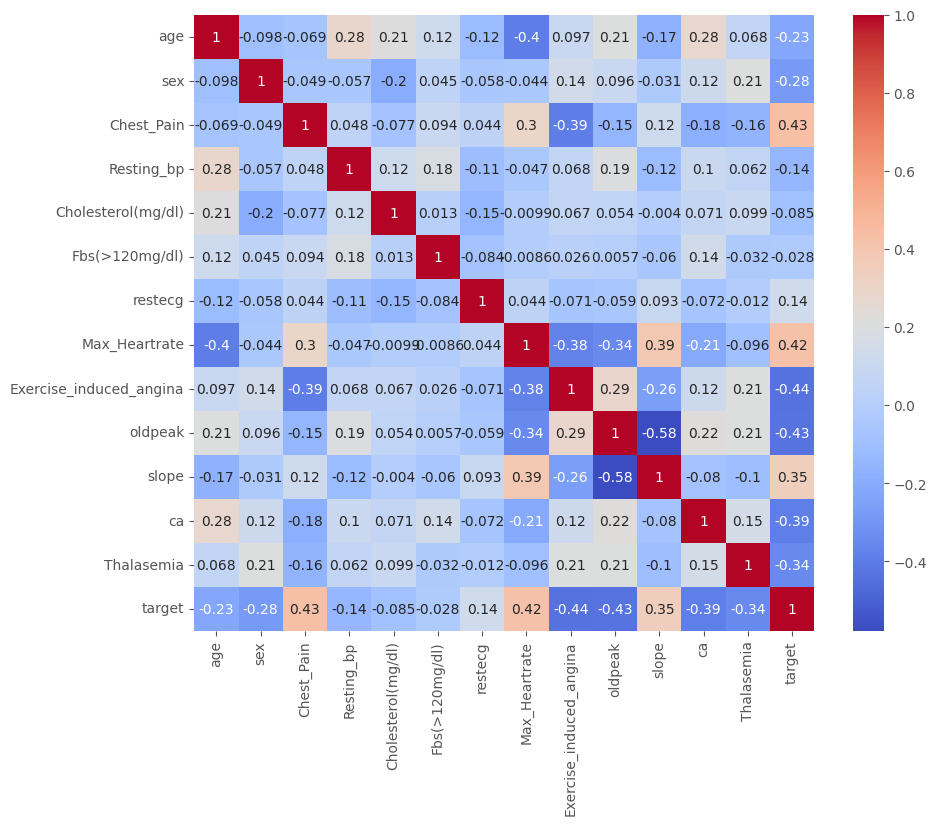

In [35]:
new = df['target'].value_counts()
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.style.use('ggplot')

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Preprocessing

In [28]:
X = df.drop('target', axis=1)
y = df['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (227, 13)
y_train shape (227,)


#### Model Fitting/Training

In [51]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [52]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.8947368421052632
Precision: 0.8837209302325582
Recall: 0.926829268292683
F1 Score: 0.9047619047619048


In [43]:
## implementing a grid search to find the best solver and C value for my model 
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.01, 0.1, 1, 10, 100]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

c:\Users\USER PC\Desktop\Project-July\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER PC\Desktop\Project-July\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER PC\Desktop\Project-July\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER PC\Desktop\Project-July\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER PC\Desktop\Project-July\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\USER P

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Score: 0.8108212560386473
